In [38]:
import subprocess
import cv2
import matplotlib.pyplot as plt
import subprocess
import os

In [47]:
def run_ilastik(image_path,ilastik_script_path ,project_path, result_base_path, export_source="Simple Segmentation", output_format="png"):
    """
    This function runs the Ilastik software in headless mode with the specified parameters.

    Parameters:
    image_path (str): The path to the image file to be processed.
    ilastik_script_path (str): The path to the Ilastik script.
    project_path (str): The path to the Ilastik project file.
    result_base_path (str): The base path where the result will be saved.
    export_source (str, optional): The type of data to export. Default is "Simple Segmentation". Must be one of ["Probabilities", "Simple Segmentation", "Uncertainty", "Features", "Labels"].
    output_format (str, optional): The format of the output file. Default is "png". Must be one of ["bmp", "gif", "hdr", "jpeg", "jpg", "pbm", "pgm", "png", "pnm", "ppm", "ras", "tif", "tiff", "xv", "bmp sequence", "gif sequence", "hdr sequence", "jpeg sequence", "jpg sequence", "pbm sequence", "pgm sequence", "png sequence", "pnm sequence", "ppm sequence", "ras sequence", "tif sequence", "tiff sequence", "xv sequence", "multipage tiff", "multipage tiff sequence", "hdf5", "compressed hdf5", "numpy, dvid"].

    Returns:
    None

    Raises:
    ValueError: If export_source or output_format is not in the allowed list.
    subprocess.CalledProcessError: If there is an error during the execution of the Ilastik command.
    """
    
    ALLOWED_SOURCES = ["Probabilities", "Simple Segmentation", "Uncertainty", "Features", "Labels"]
    ALLOWED_FORMATS = ["bmp", "gif", "hdr", "jpeg", "jpg", "pbm", "pgm", "png", "pnm", "ppm", "ras",
                    "tif", "tiff", "xv", "bmp sequence", "gif sequence", "hdr sequence", "jpeg sequence",
                    "jpg sequence", "pbm sequence", "pgm sequence", "png sequence", "pnm sequence",
                    "ppm sequence", "ras sequence", "tif sequence", "tiff sequence", "xv sequence",
                    "multipage tiff", "multipage tiff sequence", "hdf5", "compressed hdf5", "numpy, dvid"]
    
    if export_source not in ALLOWED_SOURCES:
        raise ValueError(f"Invalid export_source. Allowed values are {ALLOWED_SOURCES}")
    
    if output_format not in ALLOWED_FORMATS:
        raise ValueError(f"Invalid output_format. Allowed values are {ALLOWED_FORMATS}")
    
    # Check if result_base_path exists, if not, create it
    if not os.path.exists(result_base_path):
        os.makedirs(result_base_path)

    # Arguments to execute Ilastik in headless mode
    ilastik_args = [
        ilastik_script_path,
        "--headless",
        "--project=" + project_path,
        "--export_source=" + export_source,
        "--output_format=" + output_format,
        "--output_filename_format=" + result_base_path + "{nickname}_" + export_source.replace(" ", "_"),
        image_path
    ]

    # Execute the Ilastik command in headless mode with the specified arguments
    try:
        subprocess.run(ilastik_args, check=True)
        print("Conversion completed successfully")
    except subprocess.CalledProcessError as e:
        print("Error during conversion : ", e)
        raise

In [48]:
def display_images(image_path, result_base_path, export_source, output_format):
    """
    This function reads an original image and its corresponding result image, concatenates them horizontally, and displays the concatenated image.

    Parameters:
    image_path (str): The path to the original image file.
    result_base_path (str): The base path where the result image is saved.
    export_source (str): The type of data that was exported to create the result image.
    output_format (str): The format of the result image file.

    Returns:
    None

    Note:
    The function assumes that the result image file is named by replacing the ".jpg" extension of the original image file name with "_{export_source}.{output_format}", where {export_source} is the export_source parameter with spaces replaced by underscores.

    The function uses OpenCV to read the images and Matplotlib to display the concatenated image. The images are concatenated horizontally using cv2.hconcat. The concatenated image is displayed in RGB color space, so the function converts the color space from BGR to RGB using cv2.cvtColor.
    """
    
    input_filename = os.path.basename(image_path)

    result_path = os.path.join(result_base_path, input_filename.replace(".jpg", "_" + export_source.replace(" ", "_") + "." + output_format))

    img = cv2.imread(image_path)
    result = cv2.imread(result_path)

    concatenated_img = cv2.hconcat([img, result])

    plt.figure(figsize=(15, 15))
    plt.imshow(cv2.cvtColor(concatenated_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

INFO ilastik.app: Using tiktorch executable: ['/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/bin/python', '-m', 'tiktorch.server']
INFO ilastik.app: config file location: <none>
INFO ilastik.app: Starting ilastik from "/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/lib/python3.7".
Starting ilastik from "/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/lib/python3.7".


WARNING 2024-04-07 17:04:26,097 opConservationTracking 58472 8607285824 Could not find any ILP solver
WARNING 2024-04-07 17:04:26,106 opStructuredTracking 58472 8607285824 Could not find any ILP solver
WARNING 2024-04-07 17:04:26,109 structuredTrackingWorkflow 58472 8607285824 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!


INFO ilastik.shell.projectManager: Opening Project: /Users/titouanlegourrierec/Desktop/segment3.ilp
INFO ilastik.workflows.pixelClassification.pixelClassificationWorkflow: Beginning Batch Processing
INFO ilastik.applets.dataSelection.dataSelectionApplet: Using axistags from previous lane: [y x c, None]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to /Users/titouanlegourrierec/Desktop/ilastik_result/Sheet77_leaf3_Simple_Segmentation.png
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 176.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 10.9GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (4784, 866, 4)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 1.4GiB
DEBUG lazyflow.operators.classifierOperators: Features took 1.240121 seconds. Prediction took 9.434081 seconds. Subregion: start '[4784, 0, 0]' stop '

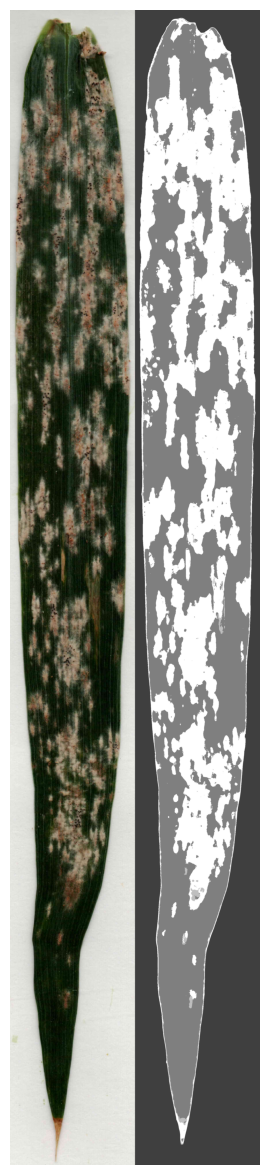

In [49]:
image_path = "/Users/titouanlegourrierec/Desktop/selection_feuilles/Sheet77_leaf3.jpg"
ilastik_script_path = "/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/run_ilastik.sh"
project_path = "/Users/titouanlegourrierec/Desktop/segment3.ilp"
result_base_path = "/Users/titouanlegourrierec/Desktop/ilastik_result/"
export_source = "Simple Segmentation"
output_format = "png"

run_ilastik(image_path = image_path,
            ilastik_script_path = ilastik_script_path,
            project_path = project_path,
            result_base_path = result_base_path,
            export_source = export_source,
            output_format = output_format)

display_images(image_path = image_path,
               result_base_path = result_base_path,
               export_source = export_source,
               output_format = output_format)